In [1]:
import pymongo
import pandas as pd
import numpy as np
from sklearn import datasets
import pickle
import time
import pymongo
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
import random
from pymongo import MongoClient
import pandas as pd
import os
import base64
import numpy as np

from PIL import Image
from io import BytesIO

Using TensorFlow backend.


# Loading Tranined Model for Retrain on Prediction Data

In [2]:
def load_saved_model_from_db(model_name, client, db, dbconnection):
    json_data = {}
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    data = mycon.find({'name': model_name})
    
    
    for i in data:
        json_data = i
    #fetching model from db
    pickled_model = json_data[model_name]
    
    return pickle.loads(pickled_model)

In [3]:
details = {
        'inserted_id':"ObjectId('5eb3e0954668994dc15066e2')",
        'model_name':"CNN",
        'created_time':1588846741.541345 }

In [4]:
model  = load_saved_model_from_db(model_name = details['model_name'], client = 'mongodb://localhost:27017/', 
                         db = 'Cat_dog_classifier', dbconnection = 'Model_Accuracy_95.0%')

# Loading Prediction Data with Accuracy More than 95% and base_64 string to convert it into orginal image and save in local Dir  for retraning the Model 

In [5]:
import pymongo

client=pymongo.MongoClient('mongodb://127.0.0.1:27017/')

db=client['Cat_dog_classifier']
Model_Accuracy_95_prediction = db.Model_Accuracy_95_prediction

In [6]:
def importing_data():
    train = []
    for record in Model_Accuracy_95_prediction.find({'Prediction':{'$gt':99.0}}):
        train.append(record)
    return train

In [7]:
df = importing_data()

In [8]:
df = pd.DataFrame(df)

In [9]:
df

,_id,filename,category,Dog,Cat,Prediction,Time,Date,Image_string_base_64
0,5eb7e2246b499e4d1db3dbea,11835.jpg,dog,0.0,1.000000e+02,100.0,16:44:42,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
1,5eb7e2246b499e4d1db3dbeb,4737.jpg,dog,0.0,1.000000e+02,100.0,16:44:42,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
2,5eb7e2246b499e4d1db3dbec,3323.jpg,dog,0.0,1.000000e+02,100.0,16:44:42,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
3,5eb7e2246b499e4d1db3dbed,4758.jpg,cat,100.0,0.000000e+00,100.0,16:44:42,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
4,5eb7e2246b499e4d1db3dbee,5678.jpg,cat,100.0,0.000000e+00,100.0,16:44:42,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
...,...,...,...,...,...,...,...,...,...
12447,5eb7e2246b499e4d1db40cb9,6422.jpg,dog,0.0,1.000000e+02,100.0,16:44:43,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
12448,5eb7e2246b499e4d1db40cba,3040.jpg,cat,100.0,0.000000e+00,100.0,16:44:43,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
12449,5eb7e2246b499e4d1db40cbb,10816.jpg,cat,100.0,0.000000e+00,100.0,16:44:43,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
12450,5eb7e2246b499e4d1db40cbc,2124.jpg,dog,0.0,1.000000e+02,100.0,16:44:43,2020-05-10,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...


# Droping Unecessary Coloums from Dataframe  

In [10]:
df = df.drop(['_id','Dog','Cat','Prediction',"Time","Date"], axis = 1) 

In [11]:
df

,filename,category,Image_string_base_64
0,11835.jpg,dog,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
1,4737.jpg,dog,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
2,3323.jpg,dog,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
3,4758.jpg,cat,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
4,5678.jpg,cat,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
...,...,...,...
12447,6422.jpg,dog,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
12448,3040.jpg,cat,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
12449,10816.jpg,cat,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...
12450,2124.jpg,dog,b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAoHBwgHBgoI...


# Coverting Base_64 string into image and saving it into loacl Dir

In [12]:
for filename,category,Image_string_base_64 in df.itertuples(index=False):
    imgdata = base64.b64decode(Image_string_base_64)
    filename = "Downloded/" + filename
    with open(filename, 'wb') as f:
        f.write(imgdata)

In [13]:
df = df.drop(["Image_string_base_64"], axis = 1) 


# In real life we always get unblanced data set and if we retarin our model using such data our model get Baised 

In [14]:
df['category'].value_counts()

cat    6401
dog    6051
Name: category, dtype: int64

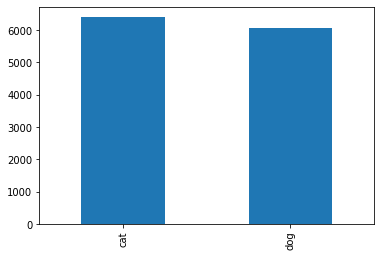

In [15]:
df['category'].value_counts().plot.bar()

# Balancing Data by delating data from a specific class

In [16]:
def save():
     if df["category"].value_counts()[0] != df["category"].value_counts()[1]:
        print("yes")
        if df["category"].value_counts()[0] >= df["category"].value_counts()[1]: # cat [5172] >= Dog [4804]
            k = df["category"].value_counts()[0] - df["category"].value_counts()[1] # Dog [5172] - cat [4804]
            cat = df.loc[df['category'] == "cat"] # creating Dataframe that contains only cat data
            dog = df.loc[df['category'] == "dog"] # creating Dataframe that contains only Dog data
            example_df = cat.sample(n=df["category"].value_counts()[1]).reset_index(drop=True) # Droping 384 value from Cat column
            t = pd.concat([example_df,dog],axis =0) #concating both DataFrame
            return t
            
        elif df["category"].value_counts()[1] >= df["category"].value_counts()[0]: # 4804 >= 5172
            k = df["category"].value_counts()[1] - df["category"].value_counts()[0] # same as above 
            cat = df.loc[df['category'] == "cat"]
            dog = df.loc[df['category'] == "dog"]
            example_df = dog.sample(n=df["category"].value_counts()[0]).reset_index(drop=True)
            t1 = pd.concat([example_df,cat],axis =0)
            return t1
            
            

In [17]:
df = save()

yes


In [18]:
df

,filename,category
0,4286.jpg,cat
1,8716.jpg,cat
2,867.jpg,cat
3,6362.jpg,cat
4,1862.jpg,cat
...,...,...
12441,2923.jpg,dog
12442,10329.jpg,dog
12445,6665.jpg,dog
12447,6422.jpg,dog


In [19]:
df['category'].value_counts()

dog    6051
cat    6051
Name: category, dtype: int64

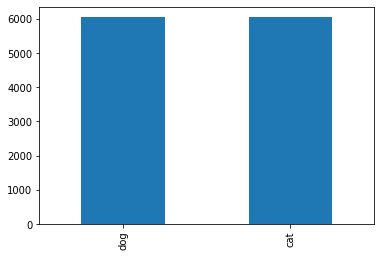

In [20]:
df['category'].value_counts().plot.bar()

# Spliiting Train and Validation Data for retrain the model 

In [21]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)


In [22]:
train_df['category'].value_counts()

dog    4851
cat    4830
Name: category, dtype: int64

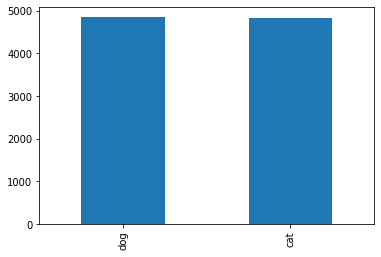

In [23]:
train_df['category'].value_counts().plot.bar()

In [24]:
validate_df['category'].value_counts()

cat    1221
dog    1200
Name: category, dtype: int64

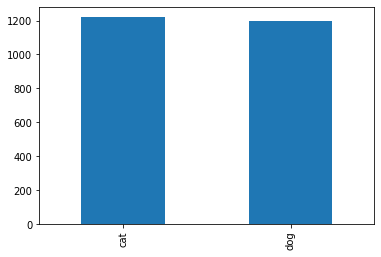

In [25]:
validate_df['category'].value_counts().plot.bar()

In [26]:
total_train = train_df.shape[0] # 20000
total_validate = validate_df.shape[0] # 500
batch_size=15


# Loading Training and val Data from local dir ( these are those images which has been converted from base_64 string to image in local Dir)

In [27]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=[IMAGE_WIDTH, IMAGE_HEIGHT]
IMAGE_CHANNELS=3

In [28]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "Downloded/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 9681 validated image filenames belonging to 2 classes.


In [29]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "Downloded/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 2421 validated image filenames belonging to 2 classes.


In [30]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [31]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [32]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Retranning the model and save into mongodb so that we can use it in production

In [33]:
epochs=2


history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)


Epoch 1/2
645/645 [==============================] - 307s 477ms/step - loss: 2.0081 - accuracy: 0.9539 - val_loss: 3.4494 - val_accuracy: 0.9553
Epoch 2/2


/home/nitin/anaconda3/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


645/645 [==============================] - 307s 476ms/step - loss: 2.1997 - accuracy: 0.9527 - val_loss: 0.0000e+00 - val_accuracy: 0.9676


In [34]:
Accuracy = history.history['accuracy']
Accuracy =  Accuracy.pop()
Accuracy = Accuracy*100
Accuracy  = round(Accuracy)
Accuracy = str(Accuracy)
Accuracy = "Model_Accuracy_" + Accuracy + "%" 
Accuracy

'Model_Accuracy_95.0%'

# Exporting Retrained Model to Mongodb 

In [35]:
def save_model_to_db(model, client, db, dbconnection, model_name):
    import pickle
    import time
    import pymongo
    #pickling the model
    pickled_model = pickle.dumps(model)
    
    #saving model to mongoDB
    # creating connection
    myclient = pymongo.MongoClient(client)
    
    #creating database in mongodb
    mydb = myclient[db]
    
    #creating collection
    mycon = mydb[dbconnection]
    info = mycon.insert_one({model_name: pickled_model, 'name': model_name, 'created_time':time.time()})
    print(info.inserted_id, ' saved with this id successfully!')
    
    details = {
        'inserted_id':info.inserted_id,
        'model_name':model_name,
        'created_time':time.time()
    }
    print(details)
    return details

In [36]:
details = save_model_to_db(model = model, client ='mongodb://localhost:27017/', db = 'Cat_dog_classifier', 
                 dbconnection = Accuracy, model_name = "CNN")

5eb7ed4b6b499e59f4642094  saved with this id successfully!
{'inserted_id': ObjectId('5eb7ed4b6b499e59f4642094'), 'model_name': 'CNN', 'created_time': 1589112140.0111814}
